In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data = pd.read_csv("wine.data",names=['classes','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines',"Proline"])
data

classes  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0          1    14.23        1.71  2.43               15.6        127   
1          1    13.20        1.78  2.14               11.2        100   
2          1    13.16        2.36  2.67               18.6        101   
3          1    14.37        1.95  2.50               16.8        113   
4          1    13.24        2.59  2.87               21.0        118   
..       ...      ...         ...   ...                ...        ...   
173        3    13.71        5.65  2.45               20.5         95   
174        3    13.40        3.91  2.48               23.0        102   
175        3    13.27        4.28  2.26               20.0        120   
176        3    13.17        2.59  2.37               20.0        120   
177        3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   classes                       178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

# EDA

In [4]:
data.describe()

classes     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

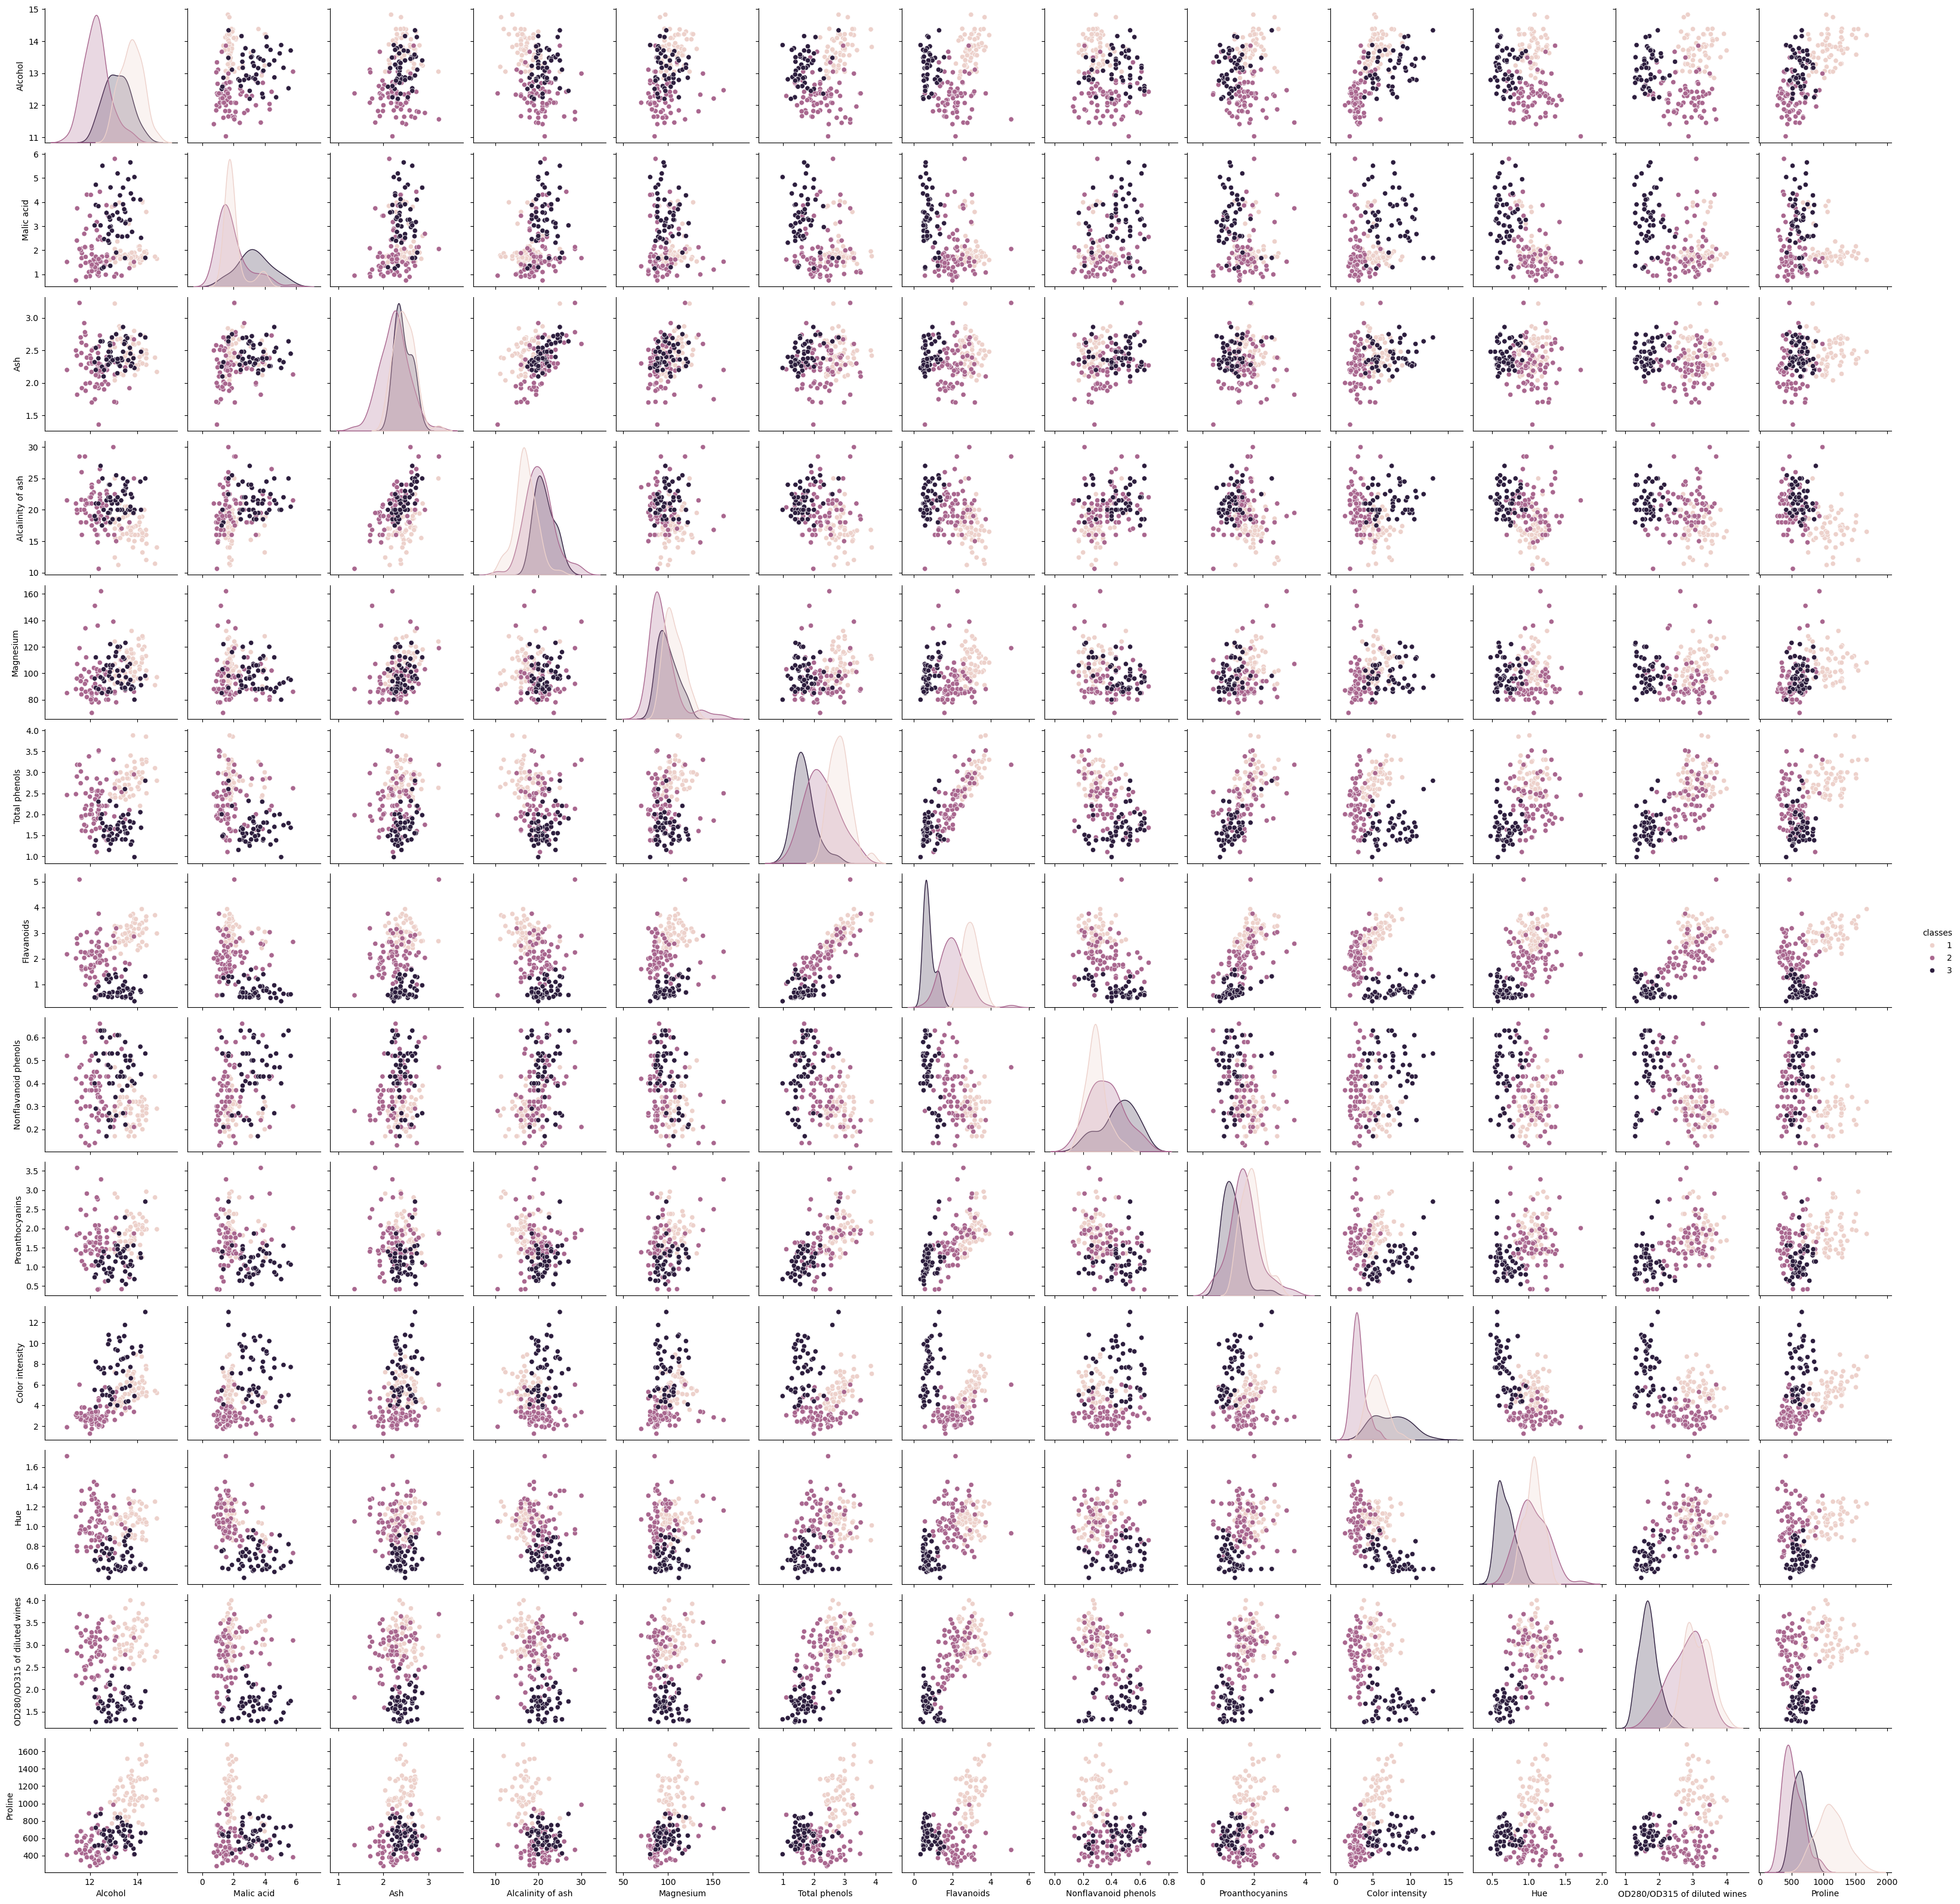

In [5]:
sns.pairplot(data,hue='classes')

### The proline content for class 1 is above 800 and class 3 lies between 400 to 1000.

<Axes: xlabel='Alcohol', ylabel='Proline'>

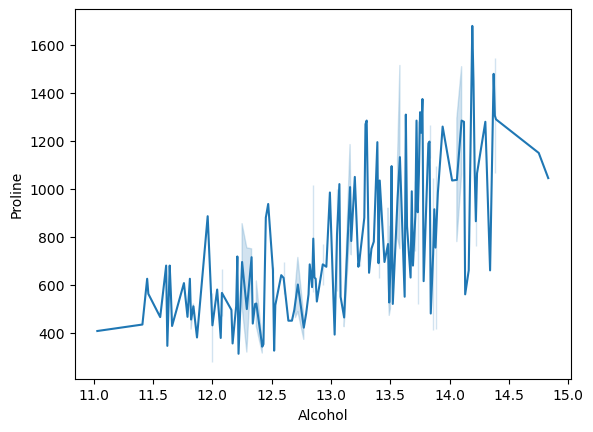

In [6]:
sns.lineplot(data,x='Alcohol',y='Proline')

<Axes: >

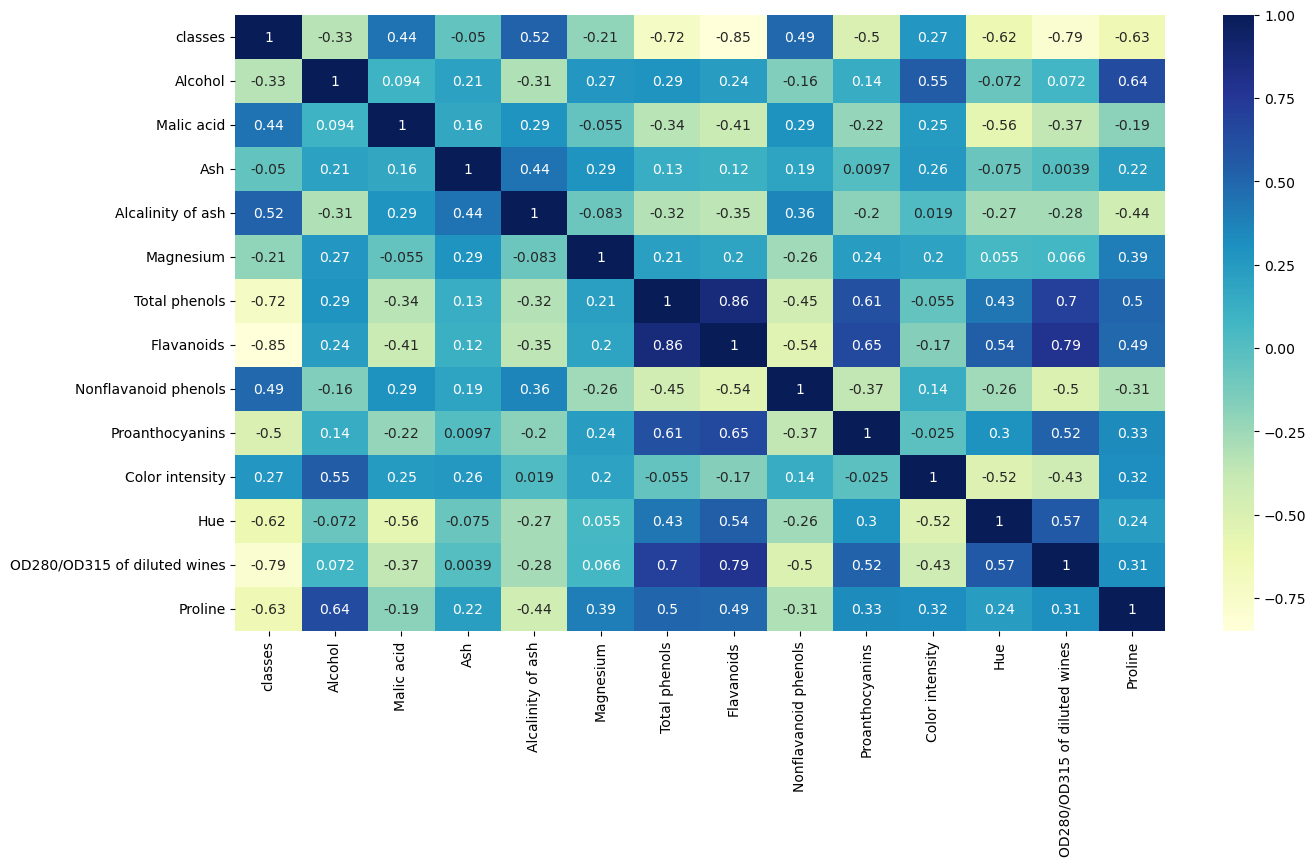

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

### We can see that proline has positive correlation with all the attributes and flavanoids and total phenols has heighest correlation here.

<Axes: xlabel='classes', ylabel='Flavanoids'>

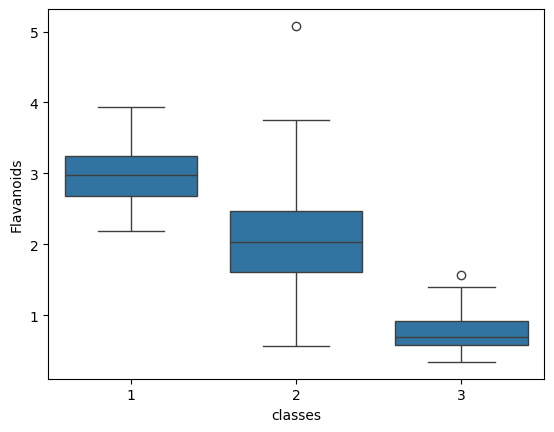

In [8]:
sns.boxplot(data,x='classes',y='Flavanoids')

<Axes: xlabel='classes', ylabel='Color intensity'>

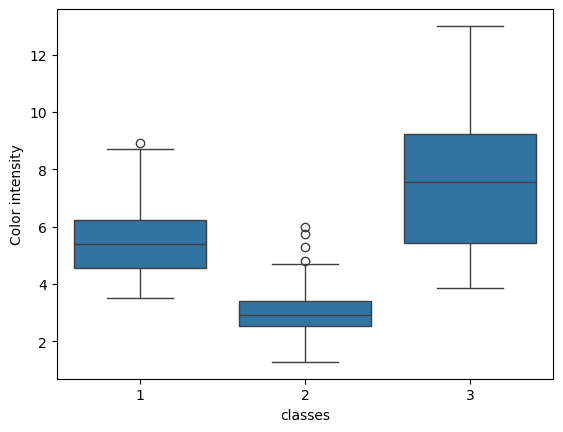

In [9]:
sns.boxplot(data,x='classes',y='Color intensity')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X = data.drop(['classes'],axis=1)
Y = data['classes']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=.8)

In [14]:
s = StandardScaler()
s_x_train = s.fit_transform(x_train)
s_x_test = s.fit_transform(x_test)

In [15]:
from sklearn.neural_network import MLPClassifier

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=100,activation='relu')
mlp.fit(s_x_train,y_train)

c:\Users\Sannath\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=100)

In [20]:
pred  = mlp.predict(s_x_test)

In [18]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test,pred)*100

100.0